# <center>Logistic Regression </center>

Logistic regression is a supervised machine learning algorithm widely used for binary classification tasks. Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given data set of independent variables.
Logistic Regression is typically used for binary classification problems based on its ‘logistic function’. 
Binary classification can represent their classes as either: positive/negative, 1/0, or True/False.
The logistic function is also known as the Sigmoid function which takes any real-valued number and maps it to a value between 0 and 1. It can be mathematically represented as:\

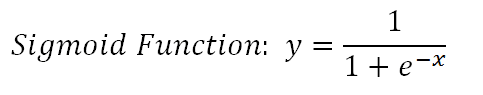

Types of Logistic Regression
<ul>
    <li>Binary logistic regression</li>
    <li>Multinomial logistic regression</li>
    <li>Ordinal logistic regression</li>
</ul>

##### Binary logistic regression

Binary Logistic Regression Assumptions
<ul>
    <li>Binary logistic regression requires the dependent variable to be binary.</li>
    <li>For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.</li>
    <li>Only the meaningful variables should be included.</li>
    <li>The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.</li>
    <li>The independent variables are linearly related to the log odds.</li>
    <li>Logistic regression requires quite large sample sizes.</li>
</ul>Keeping the above assumptions in mind, let’s look at our dataset.

#### DATA

The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y). The dataset can be downloaded from here.<a>https://archive.ics.uci.edu/dataset/222/bank+marketing</a>


In [159]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [161]:
data = pd.read_excel("Bank.xlsx")
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [163]:
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0


The dataset provides the bank customers’ information. It includes 41,188 records and 21 fields.

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [165]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.

In [167]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [169]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

### Data 

The target variable 'y'which tells whether the client will subscribe (1/0) to a term deposit. 

Distribution of 'y'

In [171]:
round(data['y'].value_counts(normalize=True)*100,2)

y
0    88.73
1    11.27
Name: proportion, dtype: float64

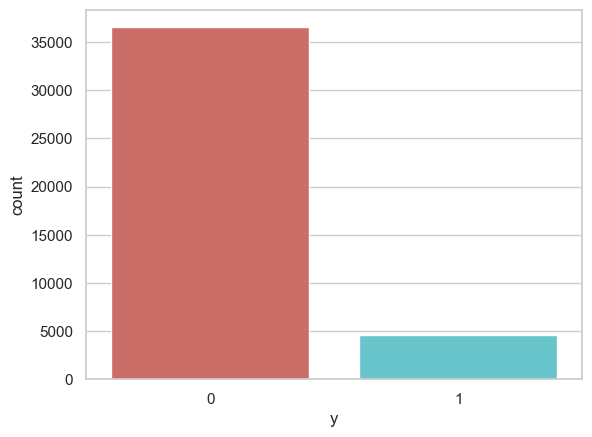

In [173]:
sns.countplot(x="y", data=data,palette="hls")
plt.show()

AS we can see 36548 0r 89% of y values are '0' -do not subscribe and only 4640 or 11% are '1' ie subscribe to term deposit.

In [175]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, let’s do some more exploration.

### Visualizations

##### Job title's role in subscription

In [177]:
data.job.value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Text(0, 0.5, 'Frequency of Purchase')

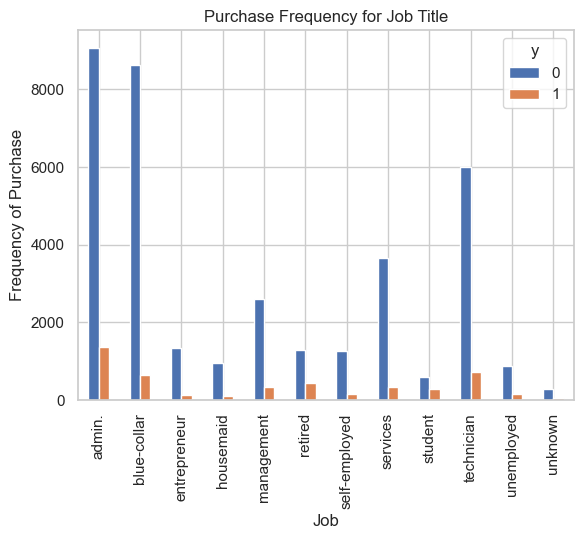

In [179]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
#plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

##### Martial Status's role in Subscription

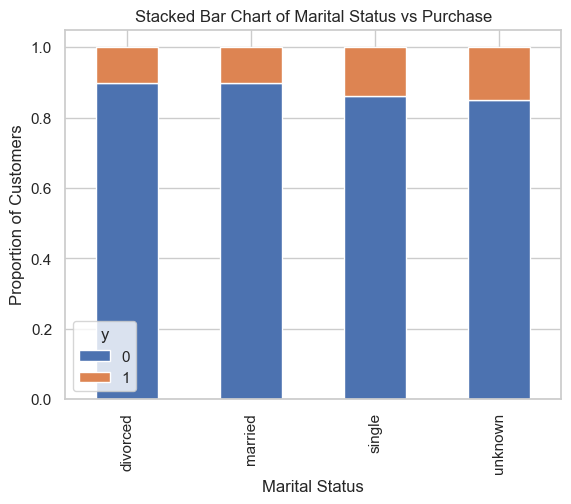

In [416]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
#plt.savefig('mariral_vs_pur_stack')

The marital status does not seem a strong predictor for the outcome variable.

##### Education's role in Subscription

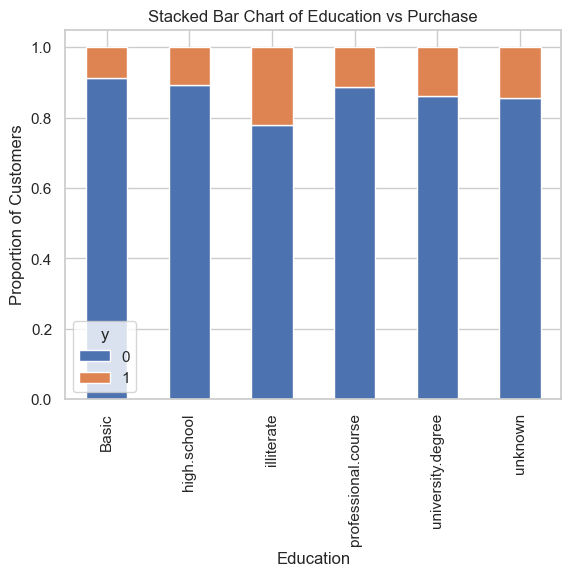

In [418]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
#plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

##### Day of Week's role in Subscription

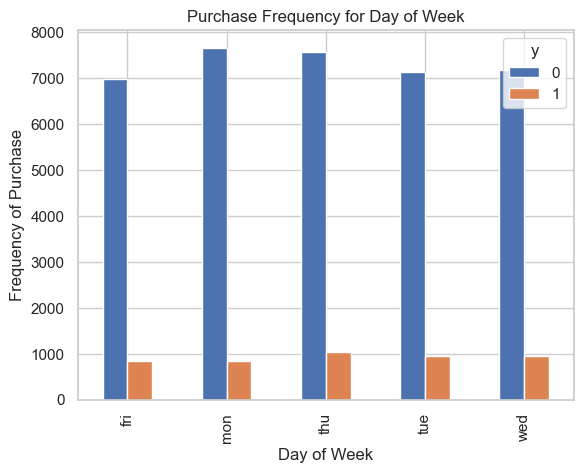

In [38]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
#plt.savefig('pur_dayofweek_bar')
plt.show()

Day of week may not be a good predictor of the outcome.

##### Months's role in Subscription

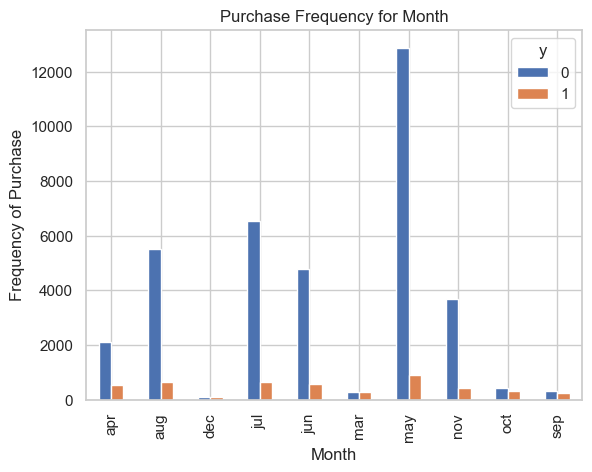

In [428]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
#plt.savefig('pur_fre_month_bar')
plt.show()

Month might be a good predictor of the outcome variable.

##### Age distribution

Text(0, 0.5, 'Frequency')

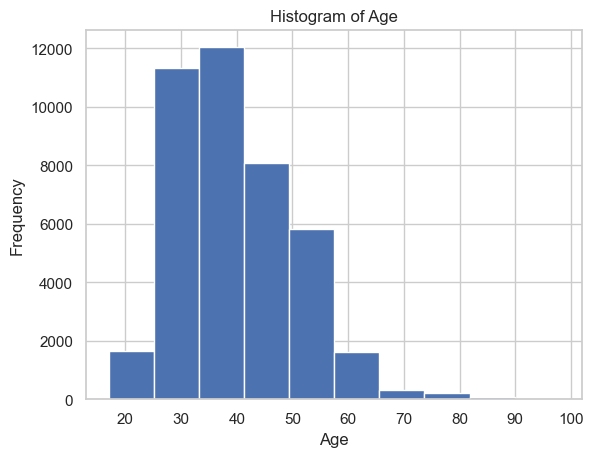

In [42]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.savefig('hist_age')

Most of the customers of the bank in this dataset are in the age range of 30–40.

##### poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”) has any effect on this campaign

Text(0, 0.5, 'Frequency of Purchase')

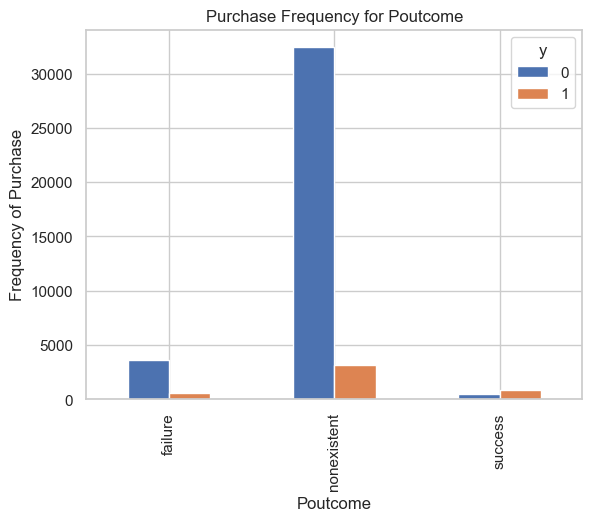

In [45]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
#plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

#### Data EncodingData Encoding is an important pre-processing step in Machine Learning. It refers to the process of converting categorical or textual data into numerical format, so that it can be used as input for algorithms to process. The reason for encoding is that most machine learning algorithms work with numbers and not with text or categorical variables.

What is Categorical Data?
When we collect data, we often encounter different types of variables. One such type is categorical variables. Categorical variables are usually represented as ‘strings’ or ‘categories’ and are finite in number.

There are two types of categorical data -

• Ordinal Data

• Nominal Data

Here are a few examples of categorical variables:
• Places: Delhi, Mumbai, Ahmedabad, Bangalore, etc.

• Departments: Finance, Human resources, IT, Production.

• Grades: A, A-, B+, B, B- etc.

Ordinal Data:

The categories of ordinal data have an Inherent Order. This means that the categories can be Ranked or ordered from highest to lowest or vice versa.

For example, the variable “highest degree a person has” is an ordinal variable. The categories (High school, Diploma, Bachelors, Masters, PhD) can be ranked in order of the level of education attained.

Nominal Data:

The categories of nominal data do not have an Inherent Order. This means that the categories cannot be ranked or ordered.

For example, the variable “city where a person lives” is a nominal variable. The categories (Delhi, Mumbai, Ahmedabad, Bangalore, etc.) ca

One-Hot Encoding:
• One-Hot Encoding is the Most Common method for encoding Categorical variables.

• a Binary Column is created for each Unique Category in the variable.

• If a category is present in a sample, the corresponding column is set to 1, and all other columns are set to0

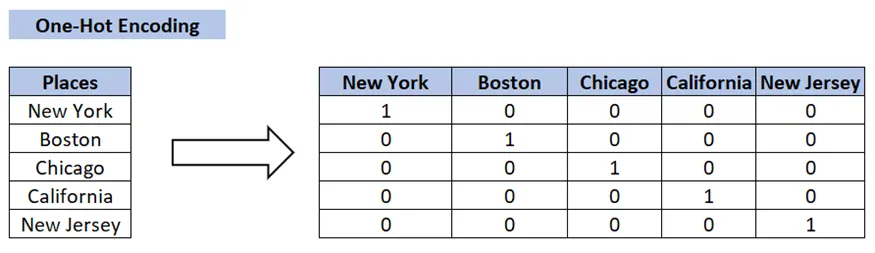
,1,0].


nnot be ranked or ordered.
.

One-Hot Encoding:
• One-Hot Encoding is the Most Common method for encoding Categorical variables.

• a Binary Column is created for each Unique Category in the variable.

• If a category is present in a sample, the corresponding column is set to 1, and all other columns are set to 0.

• For example, if a variable has three categories ‘A’, ‘B’ and ‘C’, three columns will be created and a sample with category ‘B’ will have the value [0

d2.png)

One-Hot Encoding:
• One-Hot Encoding is the Most Common method for encoding Categorical variables.

• a Binary Column is created for each Unique Category in the variable.

• If a category is present in a sample, the corresponding column is set to 1, and all other columns are set to 0.

• For example, if a variable has three categories ‘A’, ‘B’ and ‘C’, three columns will be created and a sample with category ‘B’ will have the value [0,1,0].

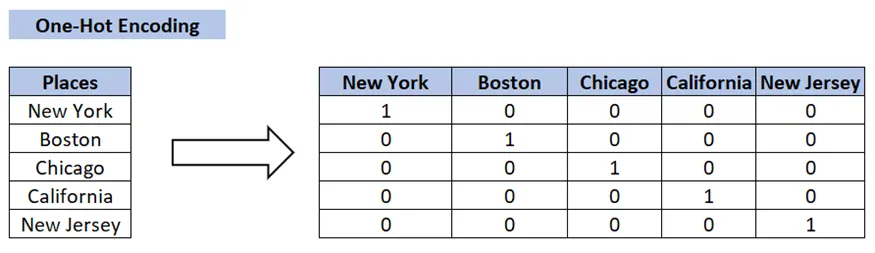

Categorical columns in the data


In [181]:
cat_vars =data.select_dtypes(include=['object']).columns.tolist()
cat_vars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

One-Hot Encoding the categorical columns and joining columns to the original DataFrame.

In [183]:
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var,dtype=int)
    data1=data.join(cat_list)
    data=data1

In [185]:
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,0,0,0,0,1,0,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0


In [187]:
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

In [61]:
y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In our data the count of 0's is 36458 and 1's are 4640.
### Class imbalance

Class imbalance: If you have many more examples of one class than another, you may end up with a model that emphasizes performance on one class (for example, if you have 99% positive examples, a model can get 99% accuracy by just classifying everything as positive). If you have class imbalance, consider up or down sampling or weighting upwards of observations of the minority class.

### Over-sampling using SMOTE

With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:

Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.


In [189]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
smo_X,smo_y=smo.fit_resample(X_train, y_train)
smo_X = pd.DataFrame(data=smo_X,columns=columns )
smo_y= pd.DataFrame(data=smo_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(smo_X))
print("Number of no subscription in oversampled data",len(smo_y[smo_y['y']==0]))
print("Number of subscription",len(smo_y[smo_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(smo_y[smo_y['y']==0])/len(smo_X))
print("Proportion of subscription data in oversampled data is ",len(smo_y[smo_y['y']==1])/len(smo_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Now we have a perfect balanced data! Only the training data was over-sampled. Because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

### Feature Engineering 

Feature engineering is the process of selecting, manipulating and transforming raw data into features that can be used in supervised learning.

Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The goal of feature engineering and selection is to improve the performance of machine learning (ML) algorithms.

#### Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features
.

In [191]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

In [225]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# rfe = RFE(logreg,step=20)
# rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
# print(rfe.support_)
# print(rfe.ranking_)

In [494]:
type(smo_X)

pandas.core.frame.DataFrame

In [193]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#n_features_to_select=1
#n_features_to_select=n_features_to_select
rfe = RFE(logreg ,step=10)
rfe.fit(smo_X, smo_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False  True
 False False False False False False False False False False  True  True
  True False  True  True False  True  True  True  True  True False  True
  True  True  True  True  True  True  True False  True False  True False
 False  True  True False False  True  True  True  True  True  True  True
 False]
[5 5 4 5 4 4 4 4 4 5 3 1 3 3 3 5 3 3 3 2 3 4 1 1 1 5 1 1 5 1 1 1 1 1 5 1 1
 1 1 1 1 1 1 3 1 4 1 3 4 1 1 5 4 1 1 1 1 1 1 1 5]


ranking_
The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank o
s,)
The mask of selected freseatu
By filtering using support_, and using ranking_, we can find out what are the columns RFE has selectres.

In [195]:
sel_cols_index = np.where(rfe.support_)[0].tolist()
features = smo_X.columns.to_list()
rfe_features = np.take(features,sel_cols_index).tolist()
rfe_features

['job_blue-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_Basic',
 'education_high.school',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_aug',
 'month_jul',
 'month_may',
 'month_nov',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent']

In [197]:
X=smo_X[rfe_features]
y=smo_y['y']
#X = X.replace({False:0, True:1})

In [199]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.312139
         Iterations 8
                                        Results: Logit
Model:                        Logit                      Method:                     MLE       
Dependent Variable:           y                          Pseudo R-squared:           0.550     
Date:                         2024-10-06 09:32           AIC:                        31979.8735
No. Observations:             51134                      BIC:                        32236.2974
Df Model:                     28                         Log-Likelihood:             -15961.   
Df Residuals:                 51105                      LL-Null:                    -35443.   
Converged:                    1.0000                     LLR p-value:                0.0000    
No. Iterations:               8.0000                     Scale:                      1.0000    
---------------------------------------------------------------------------

In [ ]:
# import statsmodels.api as sm
# logit_model=sm.Logit(y,X)
# result=logit_model.fit()
# print(result.summary2())

In [201]:
ser = result.pvalues

In [205]:
pvalue_cols = ser[ser>.05].index.tolist()

In [89]:
pvalue_cols

['marital_married']

In [207]:
X = X.drop(pvalue_cols,axis=1)

#### Logistic Regression Model Fitting

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

#### Classification Metrics

Classification is about predicting a label and then identifying which category an object belongs to based on different parameters. 

In order to measure how well our classification model is doing at making these predictions, we use classification metrics. It measures the performance of our machine learning model, giving us the confidence that these outputs can be further used in decision-making processes. 

The performance is normally presented in a range from 0 to 1, where a score of 1 represents perfecti

###### Problems with the threshold
If we use a range from 0 to 1 to represent the performance of our model, what happens when the value is 0.5? As we know from early math classes, if the probability is greater than 0.5, we round it up to 1 (positive) - if not, it is 0 (negative).

That sounds okay, but now when you are using classification models to help determine the output of real-life cases. We need to be 100% sure that the output has been correctly classifie
For example, logistic regression is used to detect spam emails. If the probability that the email is spam is based on the fact that it is above 0.5, this can be risky as we could potentially direct an important email into the spam folder. The want and need for the performance of the model to be highly accurate becomes more sensitive for health-related and financial tasks.

Therefore, using the threshold concept of values above the threshold value tend to be 1, and a value below the threshold value tends to be 0 can cause challenges.

Although there is the option to adjust the threshold value, it still raises the risk that we classify incorrectly. For example, having a low threshold will classify the majority of positive classes correctly, but within the positive will contain negative classes - vice versa if we had a high thresho
So let’s get into how these classification metrics can help us with measuring the performance of our logistic regression model

#### Accuracy
 

We will start off with accuracy because it’s the one that’s typically used the most, especially for beginners. 

Accuracy is defined as the number of correct predictions over the total predictions:

accuracy = correct_predictions / total_predictions

However, we can further expand on this usi

True Positive (TP) - you predicted positive and it’s actually positive 
True Negative (TN) - you predicted negative and it’s actually negative
False Positive (FP) - you predicted positive and it’s actually negative
False Negative (FN) - you predicted negative and it’s actually positive 
So we can say the true predictions are TN+TP, while the false prediction is FP+FN. The equation can now be redefined


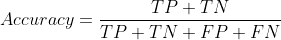

) as:ng these:ld. d.on. 

In [211]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


#Or you can also use sklearn library:
from sklearn.metrics import accuracy_score
#accuracy_score(y_train, y_pred)

However, using the accuracy metric to measure the performance of your model is usually not enough. This is where we need other metrics.

#### Confusion matrix
A confusion matrix is a table that is used to define the performance of a classification algorithm. 
A confusion matrix visualizes and summarizes the performance of a classification algorithm.

In [246]:
cc = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cc)

Confusion Matrix
[[7586   97]
 [ 862 6796]]


Since we haven't specified the third parameter for labels in confusion_matrix, the labels in y_test will be used in sorted order, i.e. in this case 0 then 1. The row labels represent actual y, and column labels represent predicted y.
<ul>
<li>The top-left corner(7547) is showing the number of failure observations, i.e. the actual y was 0 and was predicted 0, i.e. true negatives.</li> 
<li>The bottom-right corner(6798) is showing true positives, i.e. the actual y was 1 and was predicted as  1.</li>
<li>The top-right corner(119) would be actual y = 0 and predicted y = 1, i.e. false positive</li>
<li>The bottom left corner(877) would be actual y = 1 and predicted y = 0 i.e false negative</li>
</ul>

Interpreting the confusion matrix results:
<ul>
<li>7457 of y's that are not subscribed are correctly predicted as not subscribed.</li>
<li>877 of y's have actually subscribed but are predicted not subscribed.</li>
<li>6798 of y's that are subscribed are correctly subscribed as subscribed.</li>
<li>119 of y's are not subscribed but predicted as subscribed.</li>
</ul>

In [102]:
y_test.value_counts()

y
1    7675
0    7666
Name: count, dtype: int64

In [114]:
pd.Series(y_pred).value_counts()

0    8424
1    6917
Name: count, dtype: int64

In [217]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(7586, 97, 862, 6796)

In [274]:
#labels is not a positional argument but a keyword argument.
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,7586,97,7683
1,862,6796,7658
All,8448,6893,15341


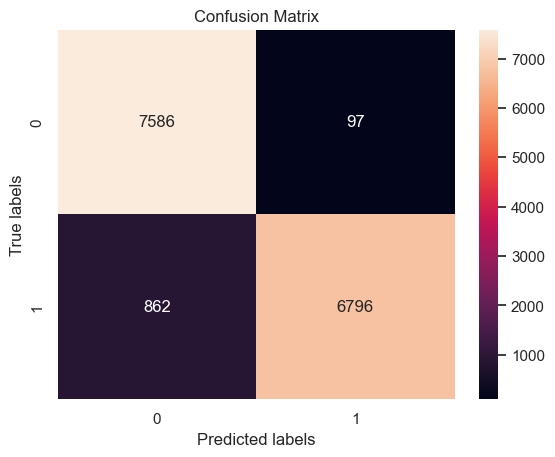

In [227]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

#### classification report
A classification report is a text summary that shows the main metrics for each class of a machine learning model. It usually includes the precision, recall, F1-score, and support for each class, as well as the weighted average of these metrics across all classes

Precision and Recall
 

If we want to further test the “accuracy” in different classes where we want to ensure that when the model predicts positive, it is in fact true positive - we use precision. We can also call this Positive Prediction Value which can be defined as:

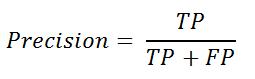

If we want to further test the “accuracy” in different classes where we want to ensure that when the model predicts negative, it actually is negative - we use recall. Recall is the same formula as sensitivity and can be defined as:

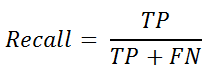



Using both precision and recall are useful metrics when there is an imbalance in the observations between the two classes. For example, there are more of one class (1) and only a few of the other class (0) in the dataset.

In order to increase the precision of your model, you will need to have fewer FP and not have to worry about the FN. Whereas, if you want to increase recall, you will need to have fewer FN and not have to worry about the FP.

Raising the classification threshold reduces false positives - increasing precision. Raising the classification threshold reduces true positives or keeps them the same, whilst increasing false negatives or keeps them the same. - decreasing recall or keeping it constant.

Unfortunately, it’s not possible to have a high precision and recall value. If you increase precision, it will reduce recall - vice versa. This is known as the precision/recall tradeoff.


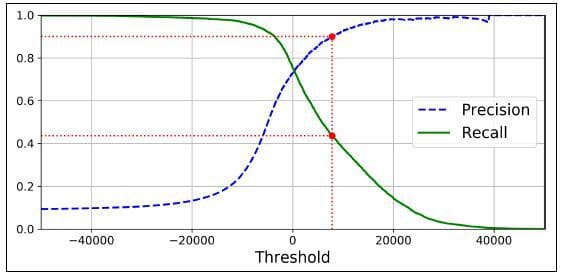

In [229]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7683
           1       0.99      0.89      0.93      7658

    accuracy                           0.94     15341
   macro avg       0.94      0.94      0.94     15341
weighted avg       0.94      0.94      0.94     15341



ROC Curve
 

When it comes to precision we care about lowering the FP and for recall we care about lowering the FN. However, there is a metric that we can use to lower both the FP and FN - it is called the Receiver Operating Characteristic curve, or ROC curve.

It plots the false positive rate (x-axis) against the true positive rate (y-axis).

True Positive Rate = TP / (TP + FN)
False Positive Rate = FP / (FP + TN)
The true positive rate is also known as sensitivity, and the false positive rate is also known as the inverted specificity rate. 

Specificity = TN / (TN + FP)
If the values on the x-axis consist of smaller values, this indicates lower FP and higher TN. If the values on the y-axis consist of larger values, this indicates higher TP and lower FN.

The ROC presents the performance of a classification model at all classification thresholds, like this:

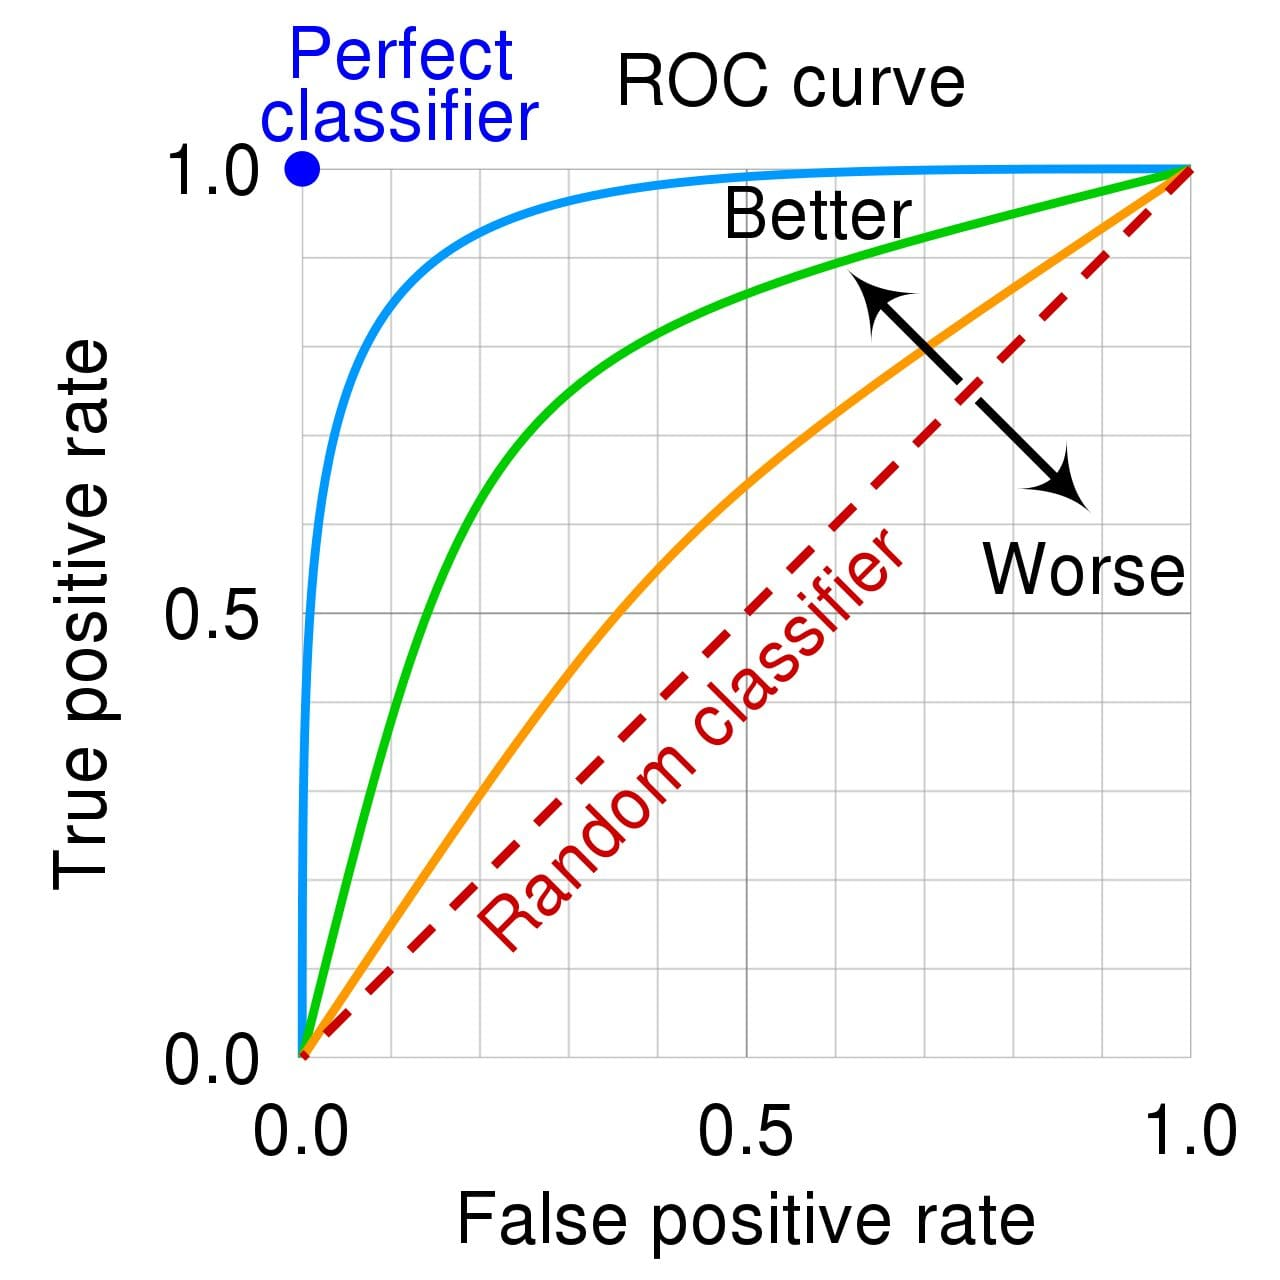

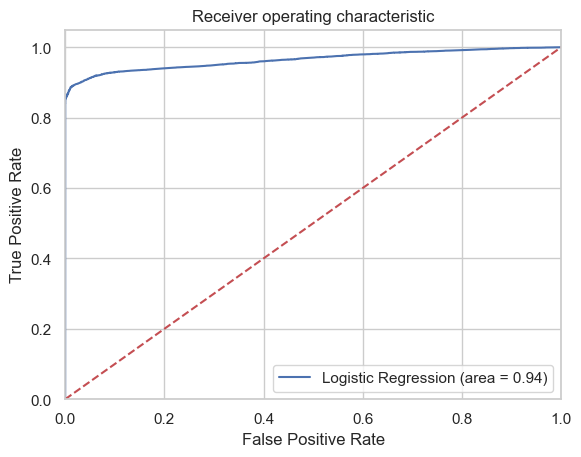

In [231]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


AUC
 

When it comes to the ROC curve, you may have also heard Area Under the Curve (AUC). It’s exactly what it says it is - the area under the curve. If you want to know how good your curve is, you calculate the ROC AUC score. ??AUC measures the performance across all possible classification thresholds.

The more area under the curve you have, the better - the higher the ROC AUC score. This is when the FN and FP are both at zero - or if we refer to the graph above, it’s when the true positive rate is 1 and the false positive rate i
The area under ROC curve is 0.94 which is pretty good.s 0. 